In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

median_household_income = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
completed_high_school = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding = "windows-1252")
below_poverty_line = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding = "windows-1252")
police_killings = pd.read_csv("PoliceKillingsUS.csv", encoding = "windows-1252")
share_of_race = pd.read_csv("ShareRaceByCity.csv", encoding = "windows-1252")

In [343]:
completed_high_school= completed_high_school.replace("-", np.NaN).dropna(axis = 0, how = "any")


In [780]:
all_states = completed_high_school["Geographic Area"].unique()
all_states = sorted(all_states)


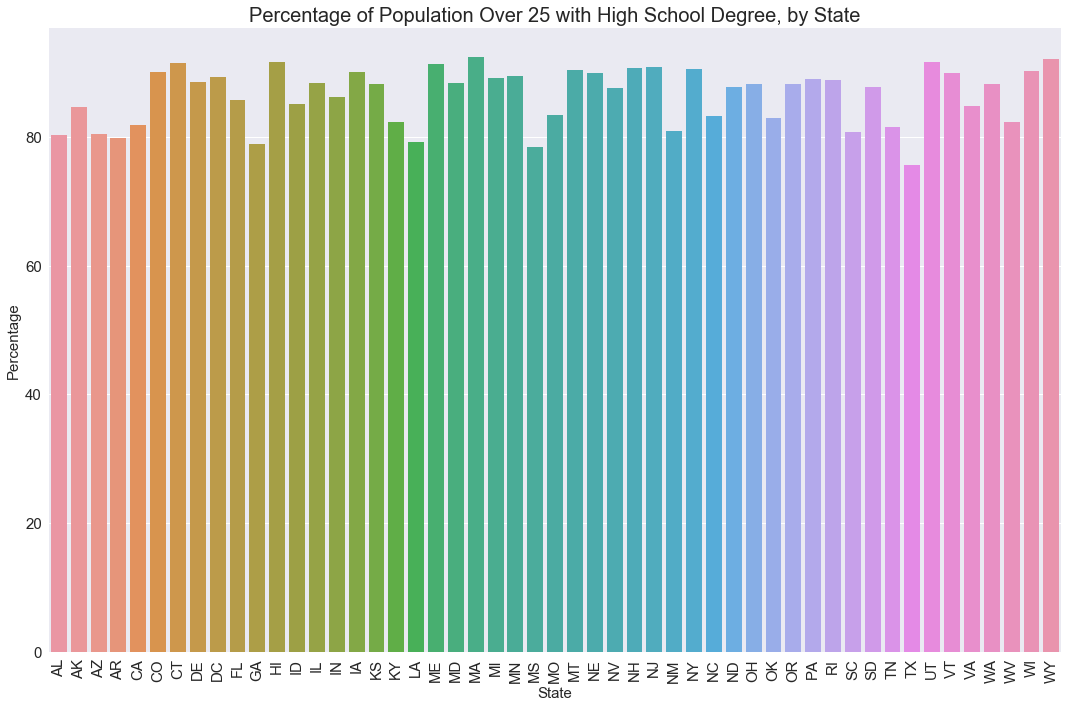

In [345]:
completed_hs_avg = {}
for x in all_states:
    state_avg = 0
    number_cities = 0
    
    for index, row in completed_high_school[completed_high_school["Geographic Area"] == x].iterrows():
        state_avg += float(row[2])
        number_cities += 1
    completed_hs_avg[x] = round(state_avg/number_cities, 2)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=all_states, y=list(completed_hs_avg.values()))
plt.xticks(range(len(completed_hs_avg)) ,list(completed_hs_avg.keys()), rotation= 90, fontsize =15)
plt.yticks(fontsize = 15)
plt.title("Percentage of Population Over 25 with High School Degree, by State", fontsize = 20)
plt.ylabel("Percentage", fontsize = 15)
plt.xlabel("State", fontsize = 15)
plt.tight_layout()
plt.show()


In [346]:
below_poverty_line = below_poverty_line.replace("-", np.NaN).dropna(axis = 0, how = "any")
below_poverty_line

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7
7,AL,Alexander City city,30.4
8,AL,Alexandria CDP,9.7
9,AL,Aliceville city,41.3


In [347]:
state_poverty_avg = {}

states = []
state_avg = []

for x in all_states:
    number_of_cities = 0
    sum_of_poverty = 0
    states.append(x)
    by_state = below_poverty_line[below_poverty_line["Geographic Area"] == x]
    for index, row in by_state.iterrows():
        number_of_cities += 1
        sum_of_poverty += float(row["poverty_rate"])
    avg_poverty_by_state = sum_of_poverty/number_of_cities
    state_poverty_avg[x] = avg_poverty_by_state
    state_avg.append(avg_poverty_by_state)


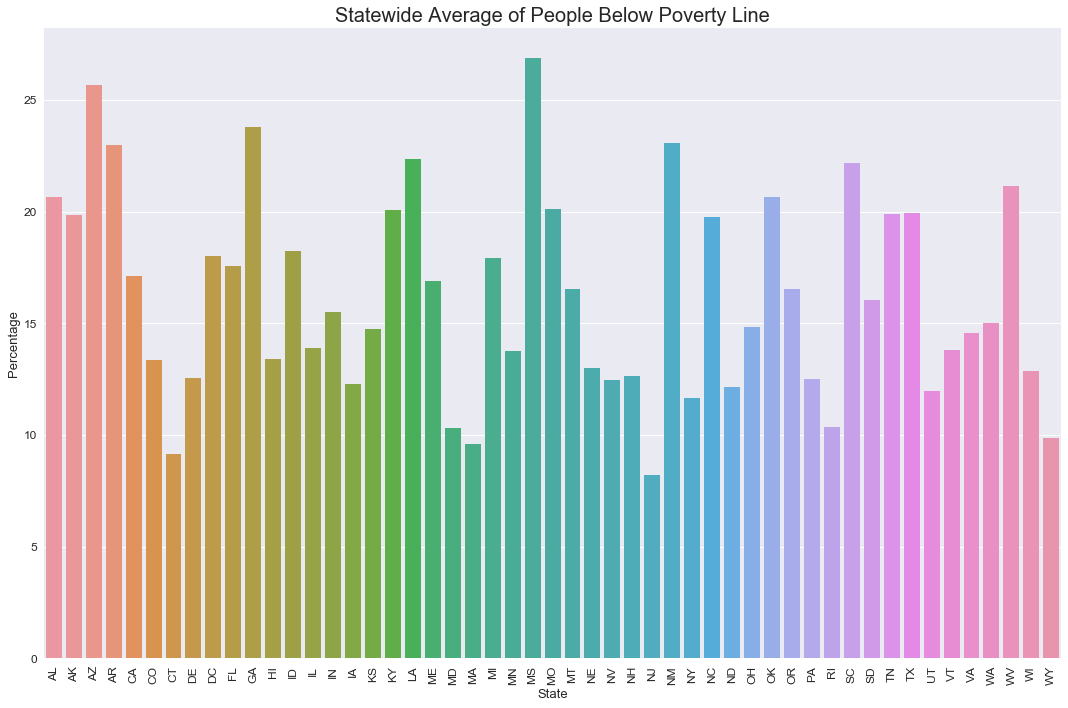

In [348]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = all_states, y = list(state_poverty_avg.values()))
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.xlabel("State", fontsize = 13)
plt.ylabel("Percentage", fontsize = 13)
plt.title("Statewide Average of People Below Poverty Line", fontsize = 20)
plt.tight_layout()
plt.show()


In [356]:
state_poverty_avg = {}
states = []
state_avg = []

for x in all_states:
    number_of_cities = 0
    sum_of_poverty = 0
    by_state = below_poverty_line[below_poverty_line["Geographic Area"] == x]
    states.append(x)
    for index, row in by_state.iterrows():
        number_of_cities += 1
        sum_of_poverty += float(row["poverty_rate"])
    avg_poverty_by_state = sum_of_poverty/number_of_cities
    state_poverty_avg[x] = avg_poverty_by_state
    state_avg.append(avg_poverty_by_state)


In [357]:
dog = pd.DataFrame({"states": states,
                   "avg_poverty_rate": state_avg})

In [360]:
dog = dog.sort_values(by= ["avg_poverty_rate"])


In [361]:
listss = dog["avg_poverty_rate"].tolist()
listsss = dog["states"].tolist()

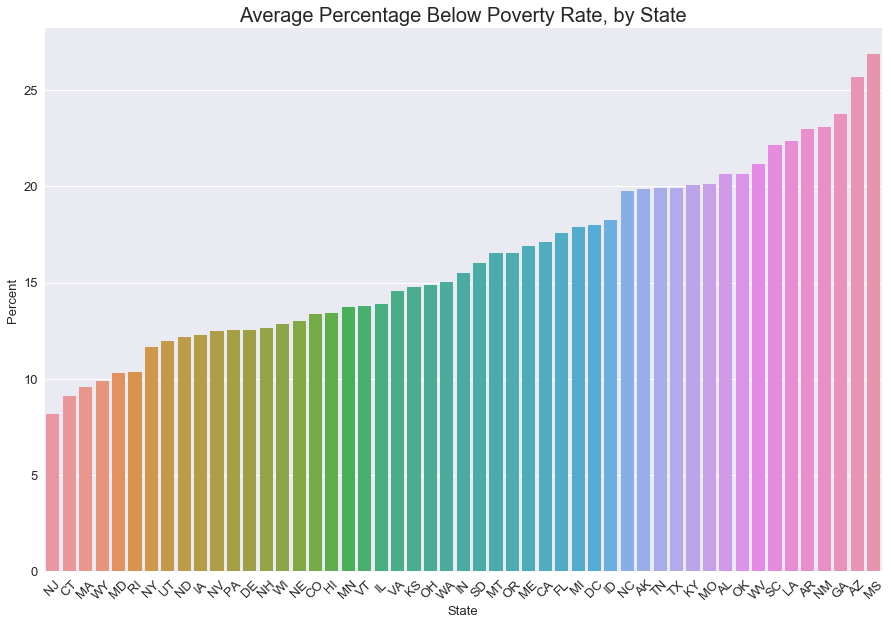

In [364]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = listsss, y = listss)
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize= 13)
plt.title("Average Percentage Below Poverty Rate, by State", fontsize = 20)
plt.xlabel("State", fontsize = 13)
plt.ylabel("Percent", fontsize = 13)
plt.show()

In [370]:
police_killings.head(1)
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [380]:
gender_of_victim = police_killings["gender"].tolist()
race_of_victim = police_killings["race"].tolist()
state_of_shooting = police_killings["state"].tolist()
threat_level = police_killings["threat_level"].tolist()
running = police_killings["flee"].tolist()

In [407]:
race_and_state = police_killings[["race"]]

In [418]:
race_and_state["state"] = police_killings["state"]

/Users/johnnyli/Desktop/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [583]:
states = {}
races = ["W", "B", "A", "N", "H", "O", "Unknown"]


for index, row in race_and_state.iterrows():
    if row["state"] not in states:
        states[row["state"]] = {}
        for y in races:
            states[row["state"]][y] = 0

    if isinstance(row["race"], float):
        states[row["state"]]["Unknown"] += 1
    else:
        states[row["state"]][row["race"]] +=1
for state in states:
    state_total = sum(states[state].values())
    states[state]["Total"] = state_total


In [639]:
state_percentages = pd.DataFrame()
# index =list(states.keys()), columns = list(states["CA"].keys())

In [651]:
# for index, row in state_percentages.iterrows():
#     dog = list(states[index].values())
#     state_percentages.append(dog)

for state in states.values():
    state_percentages.append(list(state), ignore_index= True)


In [652]:
state_percentages

""


In [662]:
murders_df = pd.DataFrame(index = list(states.keys()), data = list(states.values()))

In [740]:
murders_df = murders_df.sort_index(ascending =  True)

In [741]:
asian_bars = [i / j for i,j in zip(murders_df['A'], murders_df["Total"])]
black_bars = [i / j for i,j in zip(murders_df['B'], murders_df["Total"])]
hispanic_bars = [i / j for i,j in zip(murders_df['H'], murders_df["Total"])]
native_a_bars = [i / j for i,j in zip(murders_df['N'], murders_df["Total"])]
other_bars = [i/j for i,j in zip(murders_df['O'], murders_df["Total"])]
unknown_bars = [i / j for i,j in zip(murders_df['Unknown'], murders_df["Total"])]
white_bars = [i / j for i,j in zip(murders_df['W'], murders_df["Total"])]

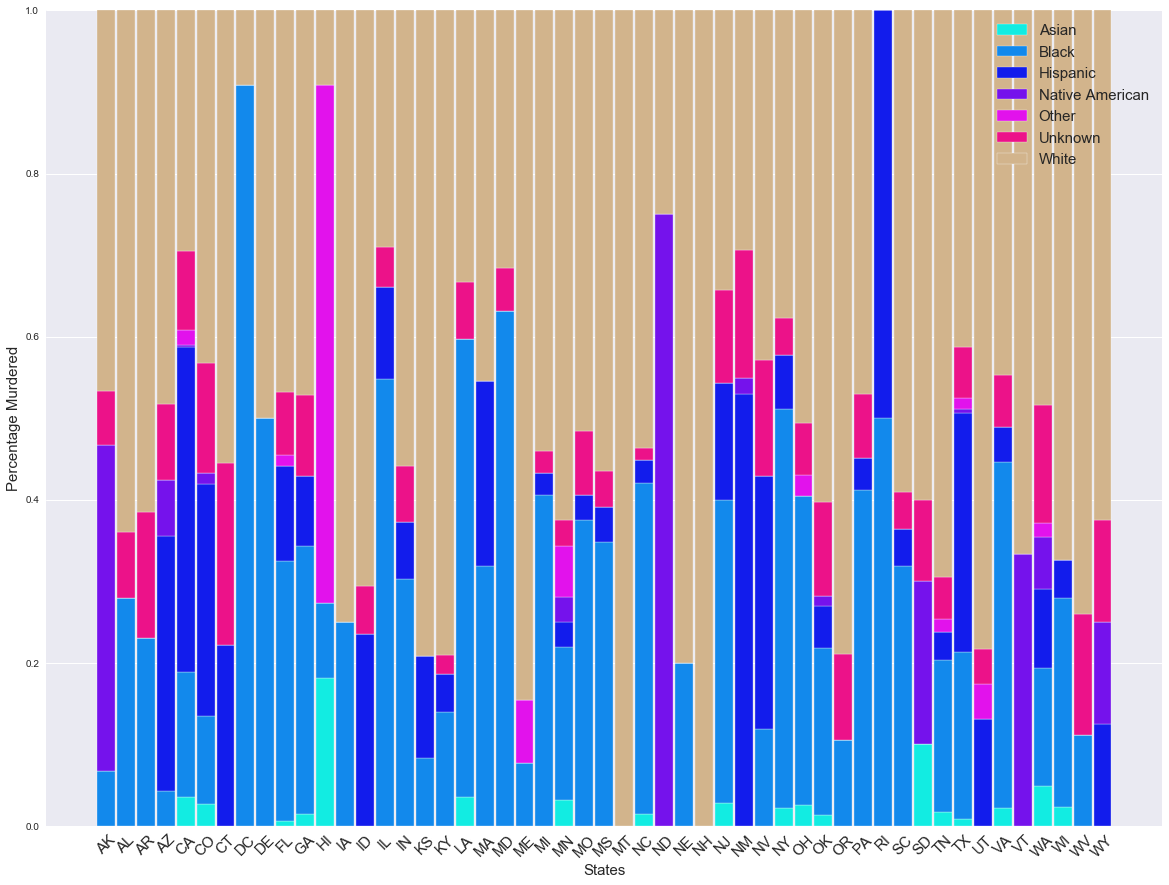

In [811]:
r = [x for x in range(0, len(asian_bars))]
barWidth = 0.9

f,ax = plt.subplots(figsize = (20,15))


# Create green Bars
plt.bar(r, asian_bars, color='#12ECE2', edgecolor='white', width=barWidth, label='Asian')
plt.bar(r, black_bars, bottom = asian_bars, color= "#1289EC", edgecolor='white', width=barWidth, label='Black')
plt.bar(r, hispanic_bars, bottom = [i+j for i,j in zip(asian_bars, black_bars)], color= "#121CEC", edgecolor='white', width=barWidth, label='Hispanic')
plt.bar(r, native_a_bars, bottom = [i+j+k for i,j,k in zip(asian_bars, black_bars, hispanic_bars)], color= "#7512EC", edgecolor='white', width=barWidth, label='Native American')
plt.bar(r, other_bars, bottom = [i+j+k+l for i,j,k,l in zip(asian_bars, black_bars, hispanic_bars, native_a_bars)], color= "#E212EC", edgecolor='white', width=barWidth, label='Other')
plt.bar(r, unknown_bars, bottom = [i+j+k+l+m for i,j,k,l,m in zip(asian_bars, black_bars, hispanic_bars, native_a_bars, other_bars)], color= "#EC1289", edgecolor='white', width=barWidth, label='Unknown')
plt.bar(r, white_bars, bottom = [i+j+k+l+m+n for i,j,k,l,m,n in zip(asian_bars, black_bars, hispanic_bars, native_a_bars, other_bars, unknown_bars)], color= "tan", edgecolor='white', width=barWidth, label='White')
plt.xlabel("States", fontsize = 15)
plt.ylabel("Percentage Murdered", fontsize= 15)
plt.xticks(range(len(all_states)) ,list(all_states), rotation= 45, fontsize =15)
plt.legend(loc = "best", prop={'size': 15})
plt.show()